# Adaptació del tutorial Maps
TFG Irene Castrillo

In [9]:
# Importem totes les llibreries


import os

# %matplotlib inline
import numpy as np
from astropy import units as u
from astropy.convolution import convolve
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.table import Table
from astropy.time import Time
import matplotlib.pyplot as plt
from IPython.display import display
from gammapy.data import EventList
from gammapy.maps import (
    LabelMapAxis,
    Map,
    MapAxes,
    MapAxis,
    TimeMapAxis,
    WcsGeom,
    WcsNDMap,
)

3D

In [14]:
energy_axis = MapAxis.from_bounds(
    10.0, 2e3, 12, interp="log", name="energy", unit="GeV"
)
counts_3d = WcsNDMap.create(
    binsz=0.1, width=10.0, skydir=(0, 0), frame="galactic", axes=[energy_axis]
)

events = EventList.read(r"gammapy-data\1.0.2\fermi-3fhl-gc\fermi-3fhl-gc-events.fits.gz")

counts_3d.fill_by_coord({"skycoord": events.radec, "energy": events.energy})
counts_3d.write("ccube.fits", format="fgst-ccube", overwrite=True)

In [15]:
counts_3d = WcsNDMap.create(
    binsz=0.1, width=10.0, skydir=(0, 0), frame="galactic", axes=[energy_axis]
)

counts_3d.fill_events(events)

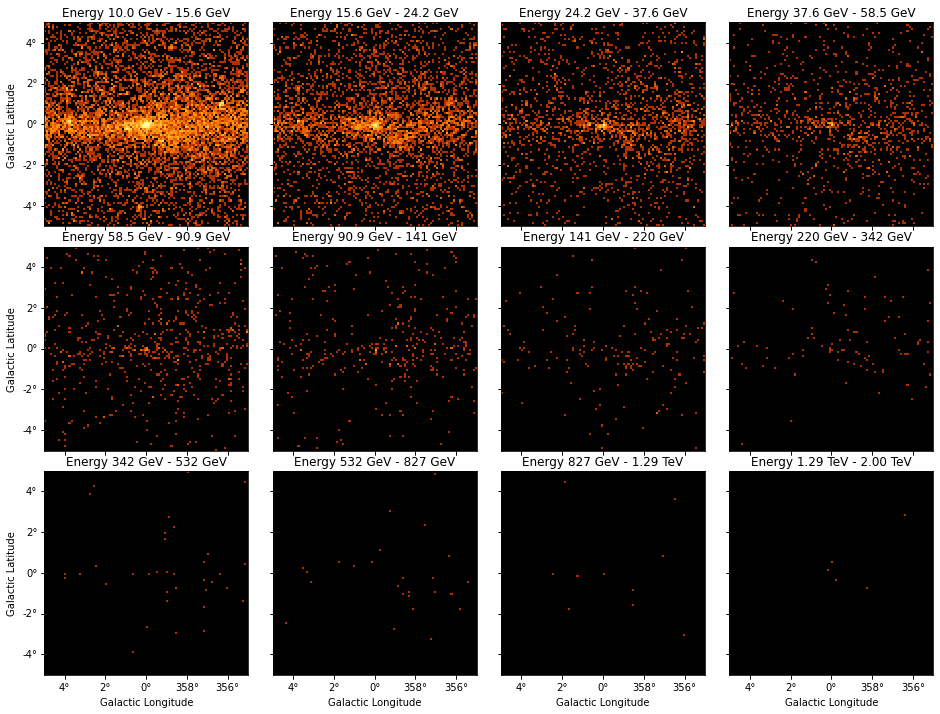

In [16]:
counts_3d.plot_grid(ncols=4, figsize=(16, 12), vmin=0, vmax=100, stretch="log")
plt.show()